In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df = pd.read_csv("../data/superstore.csv")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [16]:
df.info()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

0

In [17]:
df = df.drop_duplicates()


In [22]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()


In [23]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()

total_sales, total_profit, total_orders


(2297200.8603000003, 286397.0217, 5009)

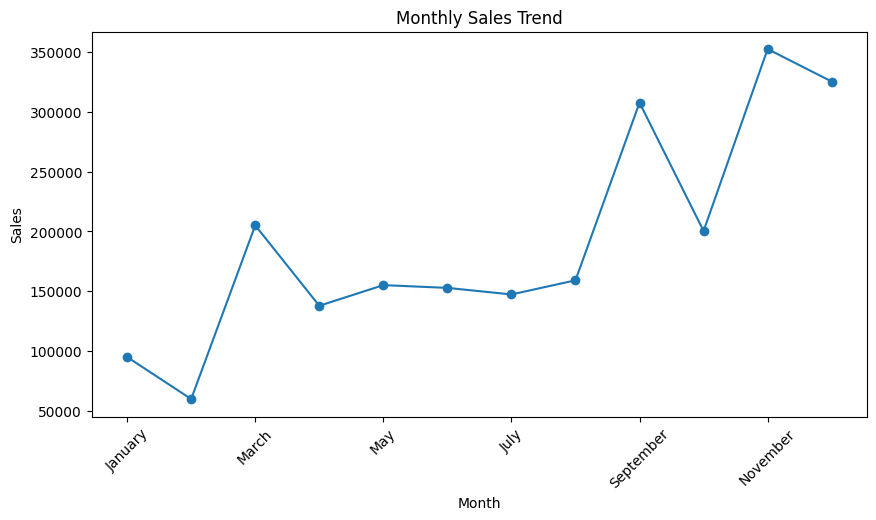

In [24]:
monthly_sales = df.groupby('Month_Name')['Sales'].sum().reindex(
    ['January','February','March','April','May','June',
     'July','August','September','October','November','December']
)

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


In [25]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales


Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

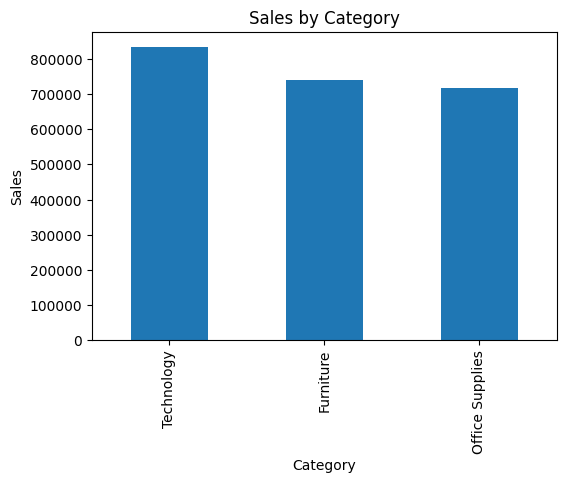

In [26]:
plt.figure(figsize=(6,4))
category_sales.plot(kind='bar')
plt.title("Sales by Category")
plt.ylabel("Sales")
plt.show()


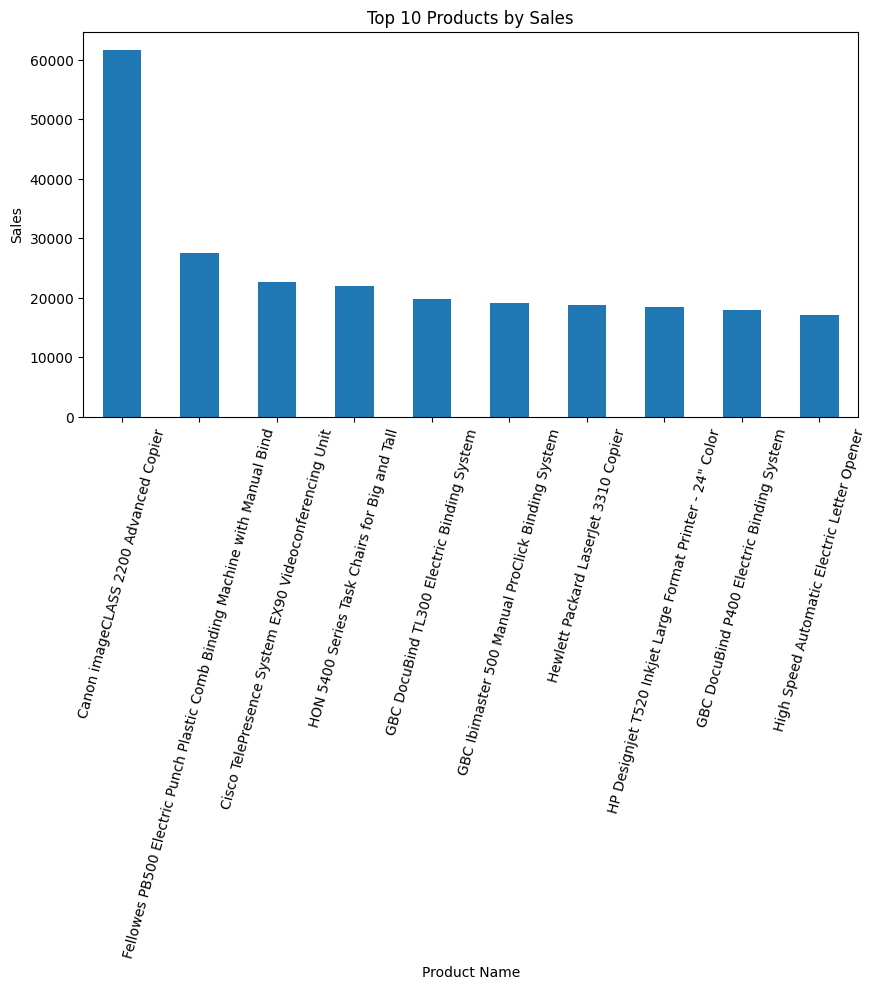

In [27]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.ylabel("Sales")
plt.xticks(rotation=75)
plt.show()


In [28]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

region_sales, region_profit


(Region
 West       725457.8245
 East       678781.2400
 Central    501239.8908
 South      391721.9050
 Name: Sales, dtype: float64,
 Region
 West       108418.4489
 East        91522.7800
 South       46749.4303
 Central     39706.3625
 Name: Profit, dtype: float64)

In [29]:
loss_products = df[df['Profit'] < 0]

loss_products[['Product Name','Category','Sales','Profit']].head()


,Product Name,Category,Sales,Profit
3,Bretford CR4500 Series Slim Rectangular Table,Furniture,957.5775,-383.0310
14,Holmes Replacement Filter for HEPA Air Cleaner...,Office Supplies,68.8100,-123.8580
15,Storex DuraTech Recycled Plastic Frosted Binders,Office Supplies,2.5440,-3.8160
23,"Global Deluxe Stacking Chair, Gray",Furniture,71.3720,-1.0196
27,"Riverside Palais Royal Lawyers Bookcase, Royal...",Furniture,3083.4300,-1665.0522


In [30]:
loss_category = loss_products.groupby('Category')['Profit'].sum()
loss_category


Category
Furniture         -60936.1090
Office Supplies   -56615.2585
Technology        -38579.9182
Name: Profit, dtype: float64

In [31]:
segment_sales = df.groupby('Segment')['Sales'].sum()
segment_profit = df.groupby('Segment')['Profit'].sum()

segment_sales, segment_profit


(Segment
 Consumer       1.161401e+06
 Corporate      7.061464e+05
 Home Office    4.296531e+05
 Name: Sales, dtype: float64,
 Segment
 Consumer       134119.2092
 Corporate       91979.1340
 Home Office     60298.6785
 Name: Profit, dtype: float64)

In [33]:
df.to_csv("../data/cleaned_superstore.csv", index=False)
